# Projet 4

Ce projet a pour but d'étudier la sous nutrition dans le monde à partir des données de la [FAO](https://www.fao.org/faostat/fr/#data/SCL). Dans ce notebook, nous ne ferons que répondre aux questions posées.

## 1. Importation

Nous commençons par quelques réglages et imports de librairie:

In [1]:
options(digits=4, width=120)
suppressWarnings(library(ggplot2))
suppressWarnings(library(plyr))
suppressWarnings(library(plotly, warn.conflicts = F))

Ceci étant fait, nous pouvons importer les données fournies par Marc, _responsable de l'équipe au sein de la FAO._

In [2]:
aide <- read.csv("aide_alimentaire.csv", encoding = 'UTF-8')
dispo <- read.csv("dispo_alimentaire.csv", encoding = 'UTF-8')
pop <- read.csv("population.csv", encoding = 'UTF-8')
sous_nut <- read.csv("sous_nutrition.csv", encoding = 'UTF-8')

## 2. Analyse primaire 

On va regarder le type des données, les valeurs etc. afin d'avoir un aperçu de chaque variable.

### 2.1 Aide alimentaire

In [3]:
head(aide)

,Pays.bénéficiaire,Année,Produit,Valeur
,<chr>,<int>,<chr>,<int>
1,Afghanistan,2013,Autres non-céréales,682
2,Afghanistan,2014,Autres non-céréales,335
3,Afghanistan,2013,Blé et Farin,39224
4,Afghanistan,2014,Blé et Farin,15160
5,Afghanistan,2013,Céréales,40504
6,Afghanistan,2014,Céréales,15989


In [4]:
summary(aide)

 Pays.bénéficiaire      Année        Produit              Valeur      
 Length:1475        Min.   :2013   Length:1475        Min.   :     0  
 Class :character   1st Qu.:2013   Class :character   1st Qu.:   288  
 Mode  :character   Median :2014   Mode  :character   Median :  1178  
                    Mean   :2014                      Mean   :  7482  
                    3rd Qu.:2015                      3rd Qu.:  4334  
                    Max.   :2016                      Max.   :265013  

In [5]:
unique(aide$Produit)

[1] "Autres non-céréales"      "Blé et Farin"             "Céréales"                 "Fruits secs, total"      
 [5] "Huiles végétales"         "Légumineuses Sèches,Tot." "Non-céréales"             "Riz, total"              
 [9] "Sucre, total"             "Céréales Secondaires"     "Lait, total"              "Mélanges et préparations"
[13] "Poiss&produi"             "BulgurFarEnt"             "Viande Total"             "Graisses Com"

In [6]:
aide = rename(aide, c("pays" = "Pays.bénéficiaire",
                       "annee" = "Année",
                       "produit" = "Produit",
                       "quantite" = "Valeur")
             )

aide[aide$pays=="Swaziland","pays"] = "Eswatini" #nom dans le fichier pop

Il n'y avait aucun problème sur ce dataframe, nous changeons uniquement le nom des colonnes et le nom de certains pays afin de le faire correspondre à celui dans le fichier population. 

Remarque: La colonne "quantite" est en tonnes. 

### 2.2 Disponibilité alimentaire

In [7]:
head(dispo)

,Zone,Produit,Origine,Aliments.pour.animaux,Autres.Utilisations,Disponibilité.alimentaire..Kcal.personne.jour.,Disponibilité.alimentaire.en.quantité..kg.personne.an.,Disponibilité.de.matière.grasse.en.quantité..g.personne.jour.,Disponibilité.de.protéines.en.quantité..g.personne.jour.,Disponibilité.intérieure,Exportations...Quantité,Importations...Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation.de.stock
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,Abats Comestible,animale,NA,NA,5,1.72,0.20,0.77,53,NA,NA,53,NA,53,NA,NA,NA
2,Afghanistan,"Agrumes, Autres",vegetale,NA,NA,1,1.29,0.01,0.02,41,2,40,39,2,3,NA,NA,NA
3,Afghanistan,Aliments pour enfants,vegetale,NA,NA,1,0.06,0.01,0.03,2,NA,2,2,NA,NA,NA,NA,NA
4,Afghanistan,Ananas,vegetale,NA,NA,0,0.00,NA,NA,0,NA,0,0,NA,NA,NA,NA,NA
5,Afghanistan,Bananes,vegetale,NA,NA,4,2.70,0.02,0.05,82,NA,82,82,NA,NA,NA,NA,NA
6,Afghanistan,"Beurre, Ghee",animale,NA,NA,23,1.17,2.61,0.03,36,NA,0,36,NA,36,NA,NA,NA


In [8]:
colnames(dispo)[names(dispo)=="Zone"] <- 'pays'

dispo[dispo$pays=="Royaume-Uni", "pays"] = "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord" #nom dans le fichier pop
dispo[dispo$pays=="Tchéquie (la)", "pays"] = "Tchéquie"

Nous changeons uniquement le nom de la colonne "Zone" pour pays et le nom de certains pays afin de le faire correspondre à celui dans le fichier population.

Remarque: Les colonnes numériques sont en milliers de tonnes

### 2.3 Population

In [9]:
head(pop)

,Zone,Année,Valeur
,<chr>,<int>,<dbl>
1,Afghanistan,2013,32270
2,Afghanistan,2014,33371
3,Afghanistan,2015,34414
4,Afghanistan,2016,35383
5,Afghanistan,2017,36296
6,Afghanistan,2018,37172


In [10]:
summary(pop)

     Zone               Année          Valeur       
 Length:1416        Min.   :2013   Min.   :      1  
 Class :character   1st Qu.:2014   1st Qu.:    378  
 Mode  :character   Median :2016   Median :   5126  
                    Mean   :2016   Mean   :  31448  
                    3rd Qu.:2017   3rd Qu.:  19307  
                    Max.   :2018   Max.   :1427648  

In [11]:
unique(is.na(pop$Valeur))

[1] FALSE

In [12]:
pop <- rename(pop, c("pays" = "Zone",
                     "annee" = "Année",
                     "pop_total" = "Valeur")
              )

In [13]:
pop['pop_total'] <- pop['pop_total']/1000

On passe la colonne "pop_total" en millions d'habitants et non en milliers, cela nous servira par la suite. On renomme également les colonnes.

### 2.4 Insécurité alimentaire

In [14]:
head(sous_nut)

,Zone,Année,Valeur
,<chr>,<chr>,<chr>
1,Afghanistan,2012-2014,8.6
2,Afghanistan,2013-2015,8.8
3,Afghanistan,2014-2016,8.9
4,Afghanistan,2015-2017,9.7
5,Afghanistan,2016-2018,10.5
6,Afghanistan,2017-2019,11.1


La valeur est au format "character" or celle-ci est numérique, regardons cela plus en détails.

In [15]:
unique(sous_nut$Valeur)

[1] "8.6"   "8.8"   "8.9"   "9.7"   "10.5"  "11.1"  "2.2"   "2.5"   "2.8"   "3"     "3.1"   "3.3"   "0.1"   "1.3"  
 [15] "1.2"   ""      "7.6"   "6.2"   "5.3"   "5.6"   "5.8"   "5.7"   "1.5"   "1.6"   "1.1"   "1.7"   "<0.1"  "21.7" 
 [29] "22.4"  "23.3"  "22.3"  "21.5"  "20.9"  "0.8"   "2"     "1.9"   "1.8"   "0.4"   "0.5"   "0.3"   "0.2"   "3.2"  
 [43] "3.4"   "3.6"   "3.8"   "2.1"   "2.3"   "2.4"   "0.6"   "0.7"   "0.9"   "3.9"   "2.7"   "1.4"   "4.8"   "4.6"  
 [57] "4.9"   "5"     "4.4"   "4.3"   "4.2"   "4.5"   "26.2"  "24.3"  "21.3"  "21.1"  "2.9"   "5.1"   "5.2"   "5.4"  
 [71] "203.8" "198.3" "193.1" "190.9" "190.1" "189.2" "23.6"  "24"    "24.1"  "3.7"   "7.3"   "7.8"   "8.4"   "9"    
 [85] "9.1"   "10.1"  "10"    "10.7"  "11.5"  "11.9"  "11.8"  "8.7"   "10.3"  "11"    "1"     "5.5"   "6.8"   "7.9"  
 [99] "5.9"   "7"     "9.2"   "9.4"   "9.6"   "6.7"   "7.1"   "7.2"   "14.7"  "17.4"  "20.2"  "22.2"  "22.8"  "24.6" 
[113] "31.1"  "28.5"  "25.4"  "24.8"  "26.1"  "14.5"  "15.4"  "16.5"  "15.8"  "15.7"  "10.8"  "11.2"  "11.6"  "12"   
[127] "12.2"  "13.5"  "13.2"  "12.8"  "13"    "13.4"  "14.1"  "4.1"   "6.1"   "6"     "6.5"   "2.6"   "8"     "8.3"

On remarque qu'il y a des cellules vides _(noté ")_ et des cellules avec "<0.1". Nous allons transformer ces valeurs en 0 mais regardons avant quels pays sont concernés.


In [16]:
unique(sous_nut[sous_nut$Valeur=="" | sous_nut$Valeur=="<0.1","Zone"])

[1] "Allemagne"                                           "Andorre"                                            
  [3] "Antigua-et-Barbuda"                                  "Argentine"                                          
  [5] "Arménie"                                             "Australie"                                          
  [7] "Autriche"                                            "Azerbaïdjan"                                        
  [9] "Bahamas"                                             "Bahreïn"                                            
 [11] "Barbade"                                             "Bélarus"                                            
 [13] "Belgique"                                            "Belize"                                             
 [15] "Bermudes"                                            "Bhoutan"                                            
 [17] "Bosnie-Herzégovine"                                  "Brésil"                                             
 [19] "Brunéi Darussalam"                                   "Burundi"                                            
 [21] "Cabo Verde"                                          "Canada"                                             
 [23] "Chine - RAS de Hong-Kong"                            "Chine - RAS de Macao"                               
 [25] "Chine, continentale"                                 "Chypre"                                             
 [27] "Comores"                                             "Croatie"                                            
 [29] "Cuba"                                                "Danemark"                                           
 [31] "Djibouti"                                            "Dominique"                                          
 [33] "Érythrée"                                            "Espagne"                                            
 [35] "Estonie"                                             "États-Unis d'Amérique"                              
 [37] "Fédération de Russie"                                "Fidji"                                              
 [39] "Finlande"                                            "France"                                             
 [41] "Grèce"                                               "Grenade"                                            
 [43] "Groenland"                                           "Guinée"                                             
 [45] "Guinée équatoriale"                                  "Guinée-Bissau"                                      
 [47] "Guyana"                                              "Hongrie"                                            
 [49] "Îles Cook"                                           "Îles Marshall"                                      
 [51] "Îles Salomon"                                        "Irlande"                                            
 [53] "Islande"                                             "Israël"                                             
 [55] "Italie"                                              "Japon"                                              
 [57] "Kazakhstan"                                          "Kiribati"                                           
 [59] "Koweït"                                              "Lettonie"                                           
 [61] "Libye"                                               "Lituanie"                                           
 [63] "Luxembourg"                                          "Macédoine du Nord"                                  
 [65] "Maldives"                                            "Malte"                                              
 [67] "Maurice"                                             "Micronésie (États fédérés de)"                      
 [69] "Monténégro"                                          "Nauru"                                              
 [71] "Niger

On peut voir ici une liste de pays très hétérogène avec des pays plus ou moins développés

In [17]:
sous_nut[sous_nut$Valeur=="","Valeur"] <- 0
sous_nut[sous_nut$Valeur=="<0.1","Valeur"] <- 0

Maintenant, nous allons la convertir en numérique.
Enfin, la colonne "Année" ne nous satisfait pas car il s'agit d'un intervalle. Nous allons, comme il l'est dit dans le lexique des données, simplifier cela en résumant l'intervalle 2012-2014 en 2013. On fera donc la moyenne de l'intervalle grâce au code suivant:

In [18]:
sous_nut$Valeur <- as.numeric(sous_nut$Valeur)

for (i in (1:nrow(sous_nut))){
    sous_nut[i,'AnDeb'] <- as.numeric(substr(sous_nut[i,'Année'], start = 1, stop = 4))
    sous_nut[i,'AnFin'] <- as.numeric(substr(sous_nut[i,'Année'], start = 6, stop = 9))
}
sous_nut['Année'] <- apply(sous_nut[c("AnDeb", "AnFin")],1,mean)
sous_nut <- subset(sous_nut, select=-c(AnDeb, AnFin))

On vérifie que cela a bien fonctionné:

In [19]:
head(sous_nut)

,Zone,Année,Valeur
,<chr>,<dbl>,<dbl>
1,Afghanistan,2013,8.6
2,Afghanistan,2014,8.8
3,Afghanistan,2015,8.9
4,Afghanistan,2016,9.7
5,Afghanistan,2017,10.5
6,Afghanistan,2018,11.1


In [20]:
unique(sous_nut$Année)

[1] 2013 2014 2015 2016 2017 2018

In [21]:
sous_nut <- rename(sous_nut, c("pays" = "Zone",
                               "annee" = "Année",
                               "pop_sous_nut" = "Valeur")
                   )

Nous terminons en changeant le nom des colonnes.

## 3. Réponses aux questions
### 3.1 Marc
#### <center><i>Question 1:</i> Proportion de personnes en état de sous-nutrition</center>

Nous allons tout d'abord faire une jointure sur les fichiers pop et sous_nut. Ensuite nous calculerons par année la population totale et en sous-nutrition.

In [22]:
m_pop_sous_nut <- merge(pop,sous_nut, by = c("pays", "annee"), all = T)
m_pop_sous_nut['proportion'] <- (m_pop_sous_nut$pop_sous_nut/m_pop_sous_nut$pop_total)*100

In [23]:
a_mondial_sous_nut <- aggregate(m_pop_sous_nut[c("pop_total", "pop_sous_nut")], m_pop_sous_nut['annee'], sum, na.rm=T)
a_mondial_sous_nut['proportion'] <- (a_mondial_sous_nut$pop_sous_nut/a_mondial_sous_nut$pop_total)*100
a_mondial_sous_nut[a_mondial_sous_nut$annee==2017, "proportion"]

pop_total_mondial_2017 <- a_mondial_sous_nut[a_mondial_sous_nut["annee"]==2017,"pop_total"]

[1] 7.097

**La proportion de personnes en état de sous-nutrition dans le monde pour l'année 2017 est de 7,1%.**

Cela représente tout de même 535 millions de personnes.

#### <center><i>Question 2:</i> Population théorique nourrissable </center>
    
<div style="text-align: justify">Nous allons voir, avec un calcul simplifié, le nombre total de personne que nous pourrions nourrir. Pour cela nous considérons qu'un humain a besoin de 2450<sup>1</sup> calories par jour.

<sup>1.</sup> Ce chiffre est obtenue en faisant la moyenne entre 2700 et 2200 qui est le nombre de calories par jour qu'ont besoin respectivement un homme et une femme. Ces valeurs sont les valeurs hautes trouvées sur internet. Nous prenons aussi comme hypothèse qu'il y a autant d'hommes que de femmes sur terre (en réalité 50,4% d'hommes).</div>

In [24]:
a_dispo <- aggregate(dispo['Disponibilité.alimentaire..Kcal.personne.jour.'],dispo['pays'],sum,na.rm=T)
ma_dispo_pop <- merge(pop[pop["annee"]==2017,c('pays', 'pop_total')], a_dispo)

ma_dispo_pop['dispo_alim'] = ma_dispo_pop$pop_total * ma_dispo_pop$Disponibilité.alimentaire..Kcal.personne.jour.
pop_theorique_nourrit <- sum(ma_dispo_pop$dispo_alim)/2450

cat("Nous aurions pu nourrir ", pop_theorique_nourrit/1000, "milliard d'êtres humains en 2017 en prenant en compte tous les produits dont nous disposons.")

Nous aurions pu nourrir  8.646 milliard d'êtres humains en 2017 en prenant en compte tous les produits dont nous disposons.

<div style="text-align: justify">En 2017, nous aurions donc pu nourrir <b>8 milliards 646 millions</b> de personnes soit presqu'1 milliard d'êtres humains supplémentaire que la population mondiale. Ce chiffre est obtenu en prenant en compte la disponibilité alimentaire des produits d'origine animale et végétale. Regardons ce qu'il se passe si nous ne prenions que les végétaux:</div>

#### <center><i>Question 3:</i> Population théorique nourrissable avec les produits d'origines végétaux uniquement</center>

In [25]:
a_dispo <- aggregate(dispo[dispo["Origine"]=="vegetale",]['Disponibilité.alimentaire..Kcal.personne.jour.'],dispo[dispo["Origine"]=="vegetale",]['pays'],sum,na.rm=T)
ma_dispo_pop <- merge(pop[pop["annee"]==2017,c('pays', 'pop_total')], a_dispo)

ma_dispo_pop['dispo_alim'] = ma_dispo_pop$pop_total * ma_dispo_pop$Disponibilité.alimentaire..Kcal.personne.jour.

pop_theorique_nourrit <- apply(ma_dispo_pop['dispo_alim'],2,sum)/2450
names(pop_theorique_nourrit) <- "Nombre de personnes pouvant être nourrit avec des produits d'origines végétales"
floor(pop_theorique_nourrit * 1000000)

Nombre de personnes pouvant être nourrit avec des produits d'origines végétales 
                                                                      7.122e+09

<div style="text-align: justify">Il serait alors possible de nourrir plus de 7 milliards d'êtres humains. Ainsi, avoir des cas de sous-nutrition montre que les ressources sont mal redistribuées.</div>

<div style="text-align: justify">Pour finir cette partie au niveau mondial, nous allons nous intérésser à l'utilisation de ces produits, en particulier à la part redistribuée aux animaux, aux êtres humains, la perte, et à la semence pour l'année 2017.</div>

#### <center><i>Question 4:</i> Utilisation de la disponibilité intérieure</center>

In [26]:
# On fait la somme des colonnes
recap_util <- apply(dispo[,c("Disponibilité.intérieure", "Nourriture", "Pertes", "Aliments.pour.animaux", "Semences")],2,
                    sum,na.rm=T)
# On divise la somme des colonnes par la dispo intérieur pour l'avoir en proportion
recap_util <- (recap_util[c("Nourriture", "Pertes", "Aliments.pour.animaux", "Semences")]/
               recap_util["Disponibilité.intérieure"])*100
names(recap_util) <- c("l'alimentation humaine", "pertes", "l'alimentation pour les animaux", 'semences')
for (i in 1:4){
    cat("La proportion de",names(recap_util[i]), "dans la disponibilité intérieure est de :", recap_util[i],"%\n")
}

La proportion de l'alimentation humaine dans la disponibilité intérieure est de : 49.51 %
La proportion de pertes dans la disponibilité intérieure est de : 4.607 %
La proportion de l'alimentation pour les animaux dans la disponibilité intérieure est de : 13.24 %
La proportion de semences dans la disponibilité intérieure est de : 1.571 %


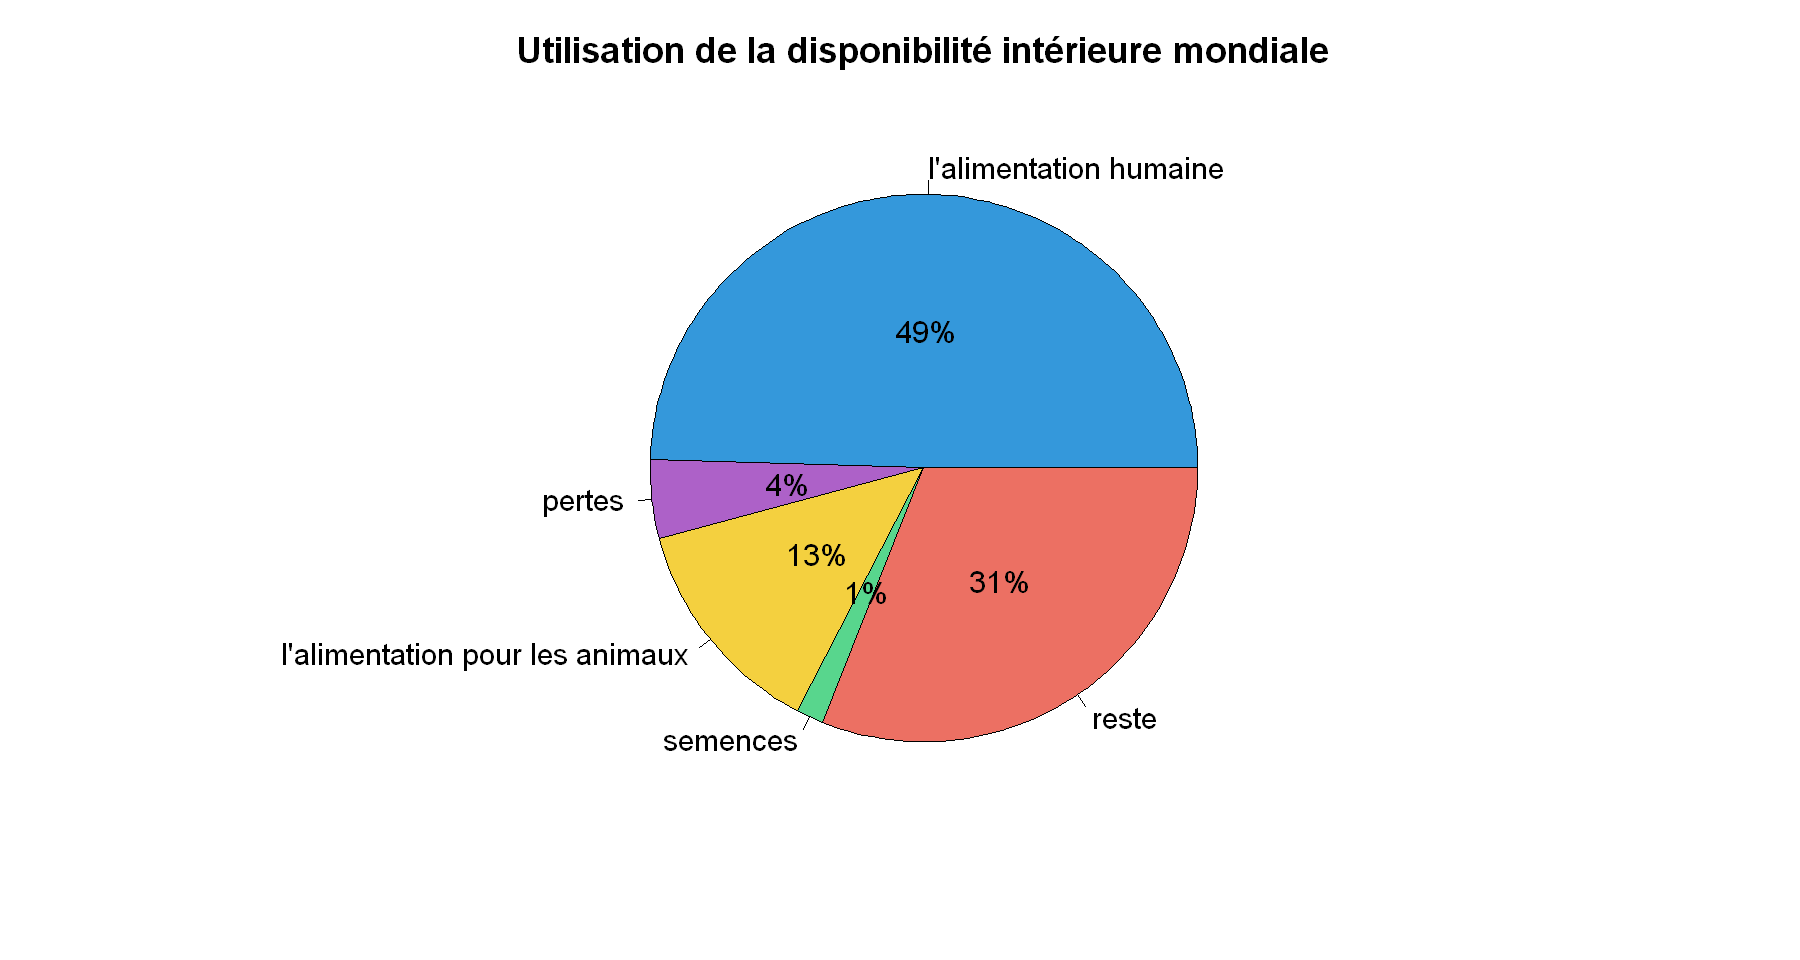

In [27]:
options(repr.plot.width=15, repr.plot.height=8)
recap_util['reste'] = 100 - sum(recap_util)
pie(recap_util,cex=1.5, main="Utilisation de la disponibilité intérieure mondiale", 
    col=c("#3498DB","#AD61C8", "#F4D03F", "#58D68D", "#EC7063"), cex.main=1.8)
#La fonction permet d'indiquer le pourcentage au centre de chaque catégorie
text_pie = function(vector,labels=c(),cex=1) {
     vector = vector/sum(vector)*2*pi
     temp = c()
     j = 0
     l = 0
     for (i in 1:length(vector)) {
          k = vector[i]/2        
          j =  j+l+k
          l = k
          text(cos(j)*0.4,sin(j)*0.4,labels[i],cex=cex)
     }
     vector = temp
}
text_pie(recap_util, c(sub("\\.","%",substr(recap_util, 1, regexpr("\\.",recap_util)))), cex=1.5)

<div style="text-align: justify">Le "reste" est la partie que nous n'avons pas inclue dans notre étude. Ces chiffres sont à prendre avec précaution, la disponibilité intérieure n'est pas exactement égale à son utilisation. </div>

### 3.2 Julien
#### <center><i>Remarque 1:</i> Relation avec la disponibilité intérieure</center>

Par intuition, nous supposons que la disponibilité intérieure est égale à la façon dont nous obtenons le produit et également à la façon dont nous le consommons.

Voici les formules:
$$Dispo\ intérieure = Production + Importations – Exportation + Variation\ de\ stock$$
$$Dispo\ intérieure = Nourriture + Pertes + Aliments\ pour\ animaux + Autres\ utilisations + Semences + Traitement$$
    
#### <center><i>Remarque 2:</i> Utilisation des céréales</center>

In [28]:
a_dispo <- aggregate(dispo[c("Disponibilité.intérieure", "Nourriture", "Pertes", "Aliments.pour.animaux", "Semences")],
    dispo["Produit"],sum,na.rm=T)

Liste_céréale <- c("Blé", "Riz (Eq Blanchi)", "Orge", "Maïs", "Seigle", "Avoine", "Millet", "Sorgho", "Céréales, Autres")


recap_cereale <- apply(a_dispo[a_dispo$Produit %in% Liste_céréale,
    c("Disponibilité.intérieure", "Nourriture", "Pertes", "Aliments.pour.animaux", "Semences")],2,sum)

In [29]:
recap_cereale <- (recap_cereale[c("Nourriture", "Pertes", "Aliments.pour.animaux", "Semences")]/
                  recap_cereale["Disponibilité.intérieure"])*100

names(recap_cereale) <- c("l'alimentation humaine", "pertes", "l'alimentation pour les animaux", 'semences')
for (i in 1:4){
    cat("La proportion de",names(recap_cereale[i]), "dans l'utilisation des céréales est de :", recap_cereale[i],"%\n")
}

La proportion de l'alimentation humaine dans l'utilisation des céréales est de : 42.75 %
La proportion de pertes dans l'utilisation des céréales est de : 4.45 %
La proportion de l'alimentation pour les animaux dans l'utilisation des céréales est de : 36.29 %
La proportion de semences dans l'utilisation des céréales est de : 2.847 %


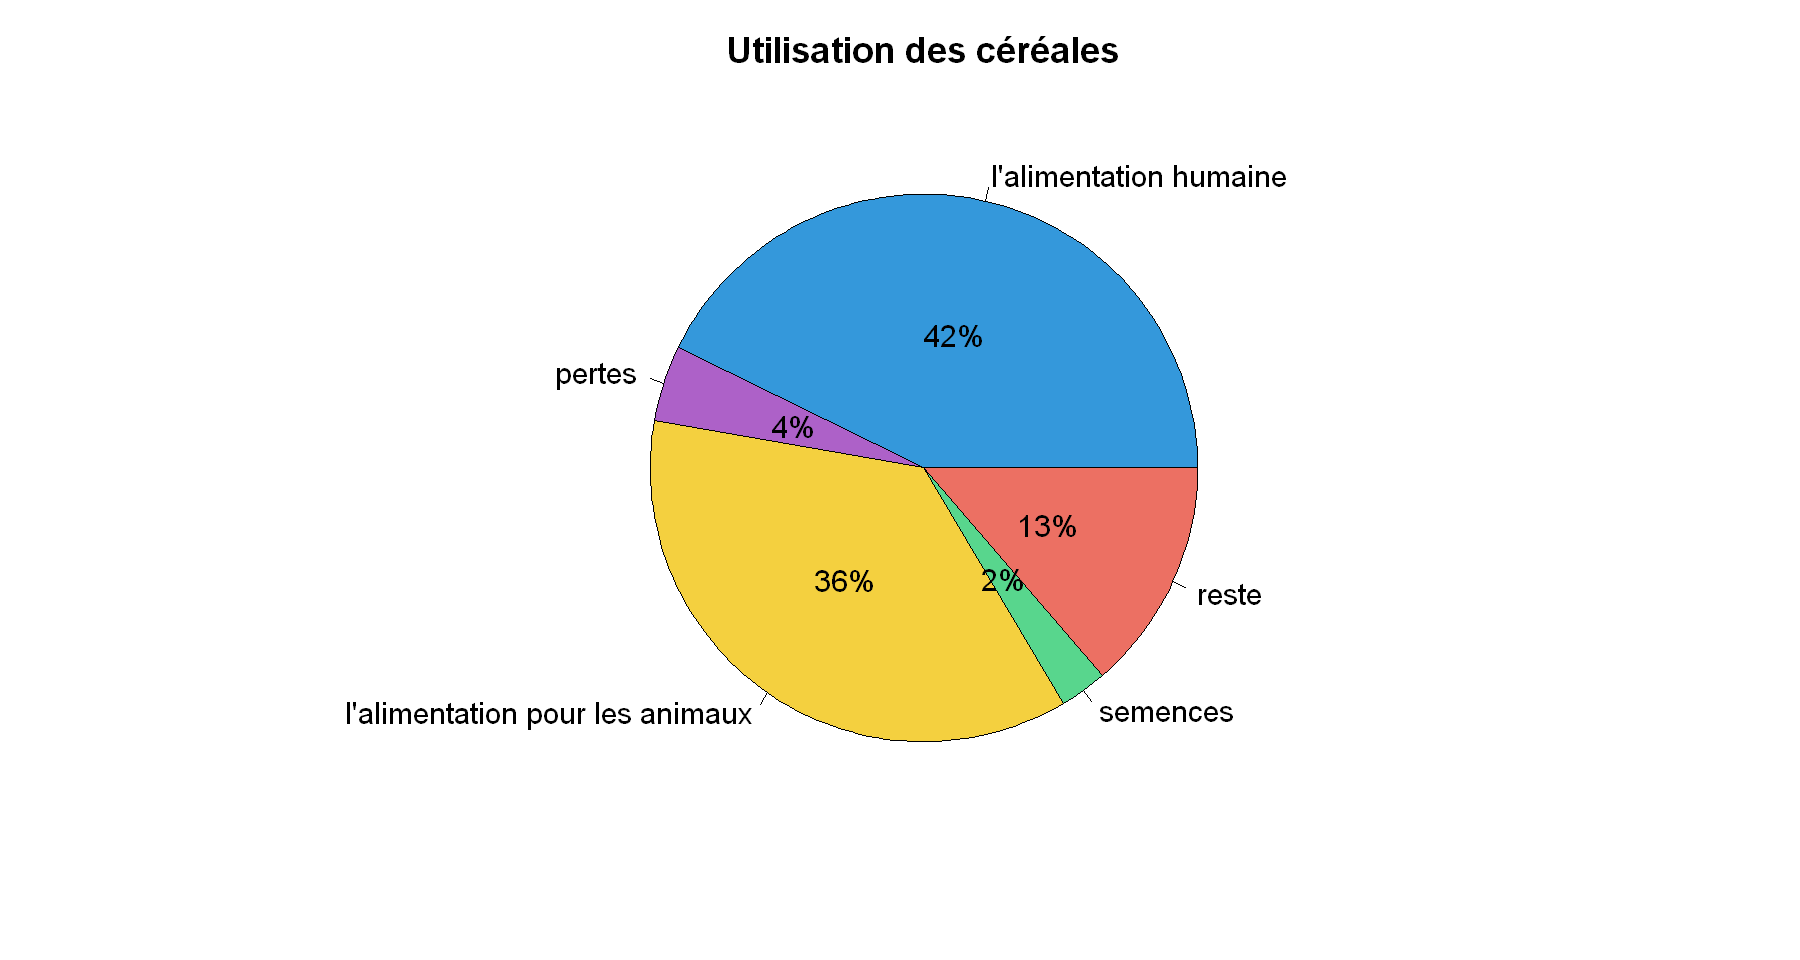

In [30]:
recap_cereale['reste'] = 100 - sum(recap_cereale)
pie(recap_cereale,cex=1.5, main="Utilisation des céréales", 
    col=c("#3498DB","#AD61C8", "#F4D03F", "#58D68D", "#EC7063"), cex.main=1.8)
text_pie = function(vector,labels=c(),cex=1) {
     vector = vector/sum(vector)*2*pi
     temp = c()
     j = 0
     l = 0
     for (i in 1:length(vector)) {
          k = vector[i]/2        
          j =  j+l+k
          l = k
          text(cos(j)*0.4,sin(j)*0.4,labels[i],cex=cex)
     }
     vector = temp
}
text_pie(recap_cereale, c(sub("\\.","%",substr(recap_cereale, 1, regexpr("\\.",recap_cereale)))), cex=1.5)

#### <center><i>Remarque 3:</i> Utilisation du Manioc par la Thaïlande</center>

In [31]:
dispo_thai <- dispo[dispo$pays=="Thaïlande",]
dispo_thai <- rename(dispo_thai, c("produit" = "Produit",
                                   "aliments_animaux" = "Aliments.pour.animaux",
                                   "autres_utilisation" = "Autres.Utilisations",
                                   "dispo_interieur" = "Disponibilité.intérieure",
                                   "exportations" = "Exportations...Quantité",
                                   "importations" = "Importations...Quantité",
                                   "nourriture" = "Nourriture",
                                   "pertes" = "Pertes",
                                   "production" = "Production",
                                   "semences" = "Semences",
                                   "traitement" = "Traitement")
                     )
# Chaque colonne est exprimé en proportion de la production
dispo_thai[c("aliments_animaux", "autres_utilisation", "dispo_interieur", "exportations", "importations",
             "nourriture", "pertes", "semences", "traitement")] =
    (dispo_thai[c("aliments_animaux", "autres_utilisation", "dispo_interieur", "exportations", "importations",
             "nourriture", "pertes", "semences", "traitement")]/
     dispo_thai$production)*100


m_pop_sous_nut_2017 <- m_pop_sous_nut[m_pop_sous_nut["annee"]==2017,]
m_pop_sous_nut_2017$annee <- NULL

dispo_thai <- merge(dispo_thai, m_pop_sous_nut_2017[c("pays", "proportion")], by="pays", all.x =T)
colnames(dispo_thai)[names(dispo_thai)=="proportion"] <- "proportion_pop_sous_nut"

dispo_thai[dispo_thai["produit"]=='Manioc', 
            c("pays","produit","aliments_animaux","autres_utilisation","dispo_interieur","exportations","importations",
             "nourriture","pertes","proportion_pop_sous_nut")]

,pays,produit,aliments_animaux,autres_utilisation,dispo_interieur,exportations,importations,nourriture,pertes,proportion_pop_sous_nut
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
51,Thaïlande,Manioc,5.955,6.884,20.72,83.41,4.135,2.881,4.999,8.958


On peut voir que la Thaïlande ne consomme que très peu de sa production de manioc. Leur production est utilisée à plus de 80% pour l'exportation.

### 3.3 Mélanie

Pour cette partie, nous commencerons par définir plusieurs variables:
<ol>
    <li>Liste_pays_sous_nut_2017: La liste des pays ayant de la population en sous-nutrition en 2017</li>
    <li>a_dispo: La somme par pays de la disponibilité alimentaire, des pertes et de la production </li>
    <li>a_aide: La somme par pays des aides cumulées depuis 2013</li>
    <li>m_dispo_pop_sous_nut: La jointure du dataframe précédent avec le fichier de disponibilité alimentaire et d'aides</li>
    <li>m_dispo_pop_sous_nut_pays: Utilisation du dataframe précédent en gardant uniquement les pays faisant partie de la liste</li>
</ol>
Regardons alors les pays avec le plus de personnes en sous-nutrition.

#### <center><i>Question 1:</i> Pays avec la proportion de personnes en état de sous-nutrition la plus élevée</center>

In [32]:
a_dispo <- aggregate(dispo[c('Disponibilité.alimentaire..Kcal.personne.jour.', 'Pertes', 'Production')],
                     dispo['pays'],sum,na.rm=T)
a_aide <- aggregate(aide["quantite"],aide["pays"],sum)


m_dispo_pop_sous_nut <- merge(m_pop_sous_nut_2017, a_dispo, by = "pays", all=T)
m_dispo_pop_sous_nut <- merge(m_dispo_pop_sous_nut, a_aide, by = "pays", all=T)

head(m_dispo_pop_sous_nut[order(m_dispo_pop_sous_nut[,"proportion"], decreasing = T),],15)

,pays,pop_total,pop_sous_nut,proportion,Disponibilité.alimentaire..Kcal.personne.jour.,Pertes,Production,quantite
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
88,Haïti,10.982,5.3,48.26,2089,679,5072,116450
183,République populaire démocratique de Corée,25.430,12.0,47.19,2093,1066,13883,187412
129,Madagascar,25.571,10.5,41.06,2056,966,14160,96678
123,Libéria,4.702,1.8,38.28,2206,111,1533,19846
120,Lesotho,2.092,0.8,38.25,2528,51,418,10624
217,Tchad,15.017,5.7,37.96,2109,459,5153,267966
187,Rwanda,11.981,4.2,35.06,2224,435,12952,11408
146,Mozambique,28.649,9.4,32.81,2282,1163,20742,58612
220,Timor-Leste,1.243,0.4,32.17,2129,14,371,116


Regardons maintenant les pays avec le plus d'aides alimentaires.

#### <center><i>Question 2:</i> Pays ayant reçu le plus d'aides alimentaires</center>

In [33]:
head(m_dispo_pop_sous_nut[order(m_dispo_pop_sous_nut$quantite, decreasing = T),],15)

,pays,pop_total,pop_sous_nut,proportion,Disponibilité.alimentaire..Kcal.personne.jour.,Pertes,Production,quantite
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
176,République arabe syrienne,17.10,0.0,0.00,NA,NA,NA,1858943
67,Éthiopie,106.40,21.1,19.83,2129,2256,46102,1381294
234,Yémen,27.83,0.0,0.00,2217,269,4125,1206484
211,Soudan du Sud,10.91,0.0,0.00,NA,NA,NA,695248
210,Soudan,40.81,5.0,12.25,2335,167,30727,669784
116,Kenya,50.22,11.9,23.70,2205,1444,28950,552836
20,Bangladesh,159.69,21.5,13.46,2453,4080,68294,348188
209,Somalie,14.59,0.0,0.00,NA,NA,NA,292678
180,République démocratique du Congo,81.40,0.0,0.00,NA,NA,NA,288502


#### <center><i>Question 3:</i> Pays avec le moins de disponibilité alimentaire</center>

In [34]:
head(m_dispo_pop_sous_nut[order(m_dispo_pop_sous_nut$Disponibilité.alimentaire..Kcal.personne.jour.),],15)

,pays,pop_total,pop_sous_nut,proportion,Disponibilité.alimentaire..Kcal.personne.jour.,Pertes,Production,quantite
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
177,République centrafricaine,4.596,0.0,0.00,1879,122,2503,66610
235,Zambie,16.854,0.0,0.00,1924,242,10526,3026
129,Madagascar,25.571,10.5,41.06,2056,966,14160,96678
1,Afghanistan,36.296,10.5,28.93,2087,1135,11171,185452
88,Haïti,10.982,5.3,48.26,2089,679,5072,116450
183,République populaire démocratique de Corée,25.430,12.0,47.19,2093,1066,13883,187412
217,Tchad,15.017,5.7,37.96,2109,459,5153,267966
236,Zimbabwe,14.237,0.0,0.00,2113,188,7914,62570
159,Ouganda,41.167,0.0,0.00,2126,991,26321,64622


#### <center><i>Question 4:</i> Pays avec le plus de disponibilité alimentaire</center>

In [35]:
head(m_dispo_pop_sous_nut[order(m_dispo_pop_sous_nut$Disponibilité.alimentaire..Kcal.personne.jour., decreasing = T),],15)

,pays,pop_total,pop_sous_nut,proportion,Disponibilité.alimentaire..Kcal.personne.jour.,Pertes,Production,quantite
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
16,Autriche,8.8199,0.0,0.00,3770,459,18129,NA
23,Belgique,11.4197,0.0,0.00,3737,564,24496,NA
227,Turquie,81.1165,0.0,0.00,3708,12036,137432,NA
66,États-Unis d'Amérique,325.0848,0.0,0.00,3682,7162,894668,NA
110,Israël,8.2438,0.0,0.00,3610,220,6906,NA
108,Irlande,4.7533,0.0,0.00,3602,236,11501,NA
111,Italie,60.6737,0.0,0.00,3578,1861,80855,NA
127,Luxembourg,0.5919,0.0,0.00,3540,11,593,NA
58,Égypte,96.4426,4.6,4.77,3518,7608,95848,1122
